# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: GRADIENT BOOSTING REGRESSOR
2. Accuracy Score: 64%
3. Cross Validation Score: 59%
4. Differential b/w Accuracy and Cross Validation Score: 0.05
4. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
     - 2.1:Import all necessary libraries
     - 2.2:Load Dataset
     - 2.3:Descriptive Analysis
     - 2.4:Observations
- Step 3: Exploratory Data Analysis
     - 3.1:Count Distribution of Categorical Data - Univariate Analysis
     - 3.2:Updating Null values
     - 3.3:Encoding
     - 3.4:Normal Distribution Check(Univariate Analysis)
     - 3.5:Scatter Plot Check(Bivariate Analysis)
     - 3.6:Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis
     - 3.7:Outlier Check
     - 3.8:Skewness Check
- Step 4: DATA PREPROCESSING
     - 4.1:Removal of Duplicates
     - 4.2:Dropping of Features that strongly promotes multicollinearity(VIF)
     - 4.3:Removal of Outliers
     - 4.4:Transforming Data to Remove Skewness using Power transformation
     - 4.5:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
     - 5.1:KNN Regression
     - 5.2:Decision Trees Regressor
     - 5.3:RandomForest Regressor
     - 5.4:GradientBoosting Regressor
     - 5.5:XGBoost Regressor
     - 5.6:ExtraTrees Regressor
     - 5.7:Support Vector Regressor(SVR)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
     - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
     - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:MODEL SAVING

# PROBLEM STATEMENT(Big Data Mart Sales Problem)

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

# Domain Knowledge
This is critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement.

- Unique identifiers does not impact sales
- Sales are higher during weekends.
- Higher sales during morning and late evening.
- Higher sales during festive periods.
- Store size affects the sales.
- Location of the store affects the sales.
- Items with more shelf space sell more.

# Step 1 - ATTRIBUTES OF VARIABLES

1. Item_Identifier - A set of data elements permanently marked on an item that is globally unique and unambiguous and never                          changes in order to provide traceability of the item throughout its total life cycle. 

2. Item_Weight - This is the actual weight of the item

3. Item_Fat_Content - The amount of fat contained in item.

4. Item_Visibility - The ability for shoppers to discover, identify, and engage with products.

5. Item_Type - This define the contents of the item and the information that is stored about it.

6. Item_MRP - Material Requirements Planning (MRP) is the system for calculating the materials and components needed to                       manufacture a particular item in an outlet/branch of a store.

7. Outlet_Identifier - The Unique identifier for each outlet/branch of various stores.

8. Outlet_Establishment_Year -  The year on which that an outlet of a store chooses to claim as its starting point.

9. Outlet_Size - The space and capacity of an outlet of a store.

10. Outlet_Location_Type - The particular place or position an outlet is positioned.

11. Outlet_Type - This refers to the nature and level of the store.

12. Item_Outlet_Sales - This is the amount of the exchange of a commodity for money generated by the outlet.

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#checking the first five rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking the last five rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#picking 4 random samples
df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6930,FDS35,9.30,Low Fat,0.111128,Breads,63.1826,OUT013,1987,High,Tier 3,Supermarket Type1,2002.0606
4483,FDY56,16.35,Regular,0.062666,Fruits and Vegetables,225.6062,OUT018,2009,Medium,Tier 3,Supermarket Type2,1579.9434
7460,FDN21,18.60,Low Fat,0.076792,Snack Foods,161.0236,OUT013,1987,High,Tier 3,Supermarket Type1,3705.8428
2667,FDE23,17.60,Regular,0.053171,Starchy Foods,45.6060,OUT035,2004,Small,Tier 2,Supermarket Type1,1724.4220


# Step 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(8523, 12)

In [7]:
#checking for nature of datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#Checking data description for all numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [11]:
#lets check the columns
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
#Checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Checking for null values
df.isnull().sum().sum()

3873

In [14]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
#Checking the content of each Categorical columns
print("The Value Counts in Item_Identifier - ",Counter(df['Item_Identifier']))
print("The Value Counts in Item_Fat_Content - ",Counter(df['Item_Fat_Content']))
print("The Value Counts in Item_Type - ",Counter(df['Item_Type']))
print("The Value Counts in Outlet_Identifier - ",Counter(df['Outlet_Identifier']))
print("The Value Counts in Outlet_Size - ",Counter(df['Outlet_Size']))
print("The Value Counts in Outlet_Location_Type - ",Counter(df['Outlet_Location_Type']))
print("The Value Counts in Outlet_Type - ",Counter(df['Outlet_Type']))

The Value Counts in Item_Identifier -  Counter({'FDG33': 10, 'FDW13': 10, 'FDV38': 9, 'FDX20': 9, 'FDP25': 9, 'DRE49': 9, 'FDV60': 9, 'NCY18': 9, 'DRN47': 9, 'FDW49': 9, 'FDX31': 9, 'FDO19': 9, 'NCJ30': 9, 'NCF42': 9, 'FDD38': 9, 'NCB18': 9, 'FDG09': 9, 'NCI54': 9, 'FDF52': 9, 'NCL31': 9, 'FDF56': 9, 'NCQ06': 9, 'FDT07': 9, 'FDW26': 9, 'FDQ40': 9, 'FDU12': 9, 'FDX04': 9, 'FDA15': 8, 'FDO10': 8, 'FDC14': 8, 'NCX29': 8, 'FDV20': 8, 'NCP05': 8, 'DRK35': 8, 'FDJ58': 8, 'FDA44': 8, 'FDS52': 8, 'DRK12': 8, 'FDK58': 8, 'FDL58': 8, 'FDR44': 8, 'FDP28': 8, 'FDA39': 8, 'FDH28': 8, 'DRF27': 8, 'FDX21': 8, 'FDY56': 8, 'FDF05': 8, 'FDL20': 8, 'FDY03': 8, 'FDJ55': 8, 'FDG24': 8, 'FDY55': 8, 'FDH27': 8, 'FDR04': 8, 'FDS33': 8, 'FDY49': 8, 'FDR59': 8, 'FDR43': 8, 'FDW24': 8, 'FDF22': 8, 'DRP35': 8, 'FDB17': 8, 'NCO54': 8, 'FDA13': 8, 'FDR52': 8, 'NCM07': 8, 'NCI29': 8, 'FDD29': 8, 'NCQ43': 8, 'DRF03': 8, 'FDT32': 8, 'FDK20': 8, 'FDU13': 8, 'FDZ26': 8, 'FDL34': 8, 'DRF01': 8, 'FDG38': 8, 'NCE31': 8, 'N

In [16]:
#Checking the content of each Categorical columns
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [20]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [23]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Step 2.4 - Observations


# The Train Dataset is made up of;
- 8523 rows and 12 columns
- 11 features and 1 Target

# Description of Features:
1. Item_Identifier: 
- It is made up of Categorical data
- It has 1559 factors; FDW13,FDG33,NCY18,FDD38,DRE49 etc 
- It has no null values
- Its Datatype is an Object type

2. Item_Weight:
- It is made up of Continuos data
- It has null values to the tune of 1463
- Its Datatype is an floating type

3. Item_Fat_Content: 
- It is made up of Categorical data
- It has 5 factors; Low Fat(5089), Regular(2889), LF(316), reg(117), low fat(112)
- It has no null values
- Its Datatype is an Object type

4. Item_Visibility:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

5. Item_Type: 
- It is made up of Categorical data
- It has 16 factors; Fruits and Vegetables(1232), nack Foods(1200), Household(910), Frozen Foods(856), Dairy(682), Canned(649)                        Baking Goods(648), Health and Hygiene(520),Soft Drinks(445), Meat(425), Breads(251), Hard Drinks(214),                          Others(169), Starchy Foods(148),Breakfast(110),Seafood(64)
- It has no null values
- Its Datatype is an Object type

6. Item_MRP:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

7. Outlet_Identifier: 
- It is made up of Categorical data
- It has 10 factors; OUT027(935), OUT013(932), OUT049(930), OUT046(930), OUT035(930), OUT045(929), OUT018(928), OUT017(926)
                     OUT010(555), OUT019(528)
- It has no null values
- Its Datatype is an Object type

8. Outlet_Establishment_Year:
- It is made up of Continuos data
- It has no null values
- Its Datatype is an interger type

9. Outlet_Size: 
- It is made up of Categorical data
- It has 3 factors; Medium(2793), Small(2388), High(932)
- It has null values to the tune of 2410
- Its Datatype is an Object type

10. Outlet_Location_Type: 
- It is made up of Categorical data
- It has 3 factors; Tier 3(3350), Tier 2(2785), Tier 1(238)
- It has no null values
- Its Datatype is an Object type

11. Outlet_Type: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type


# About the Target/Label:
12. Item_Outlet_Sales: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is a floating type
- It is made up of Continuos data


**Since the target is made up of a continuos data hence this is a REGRESSION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


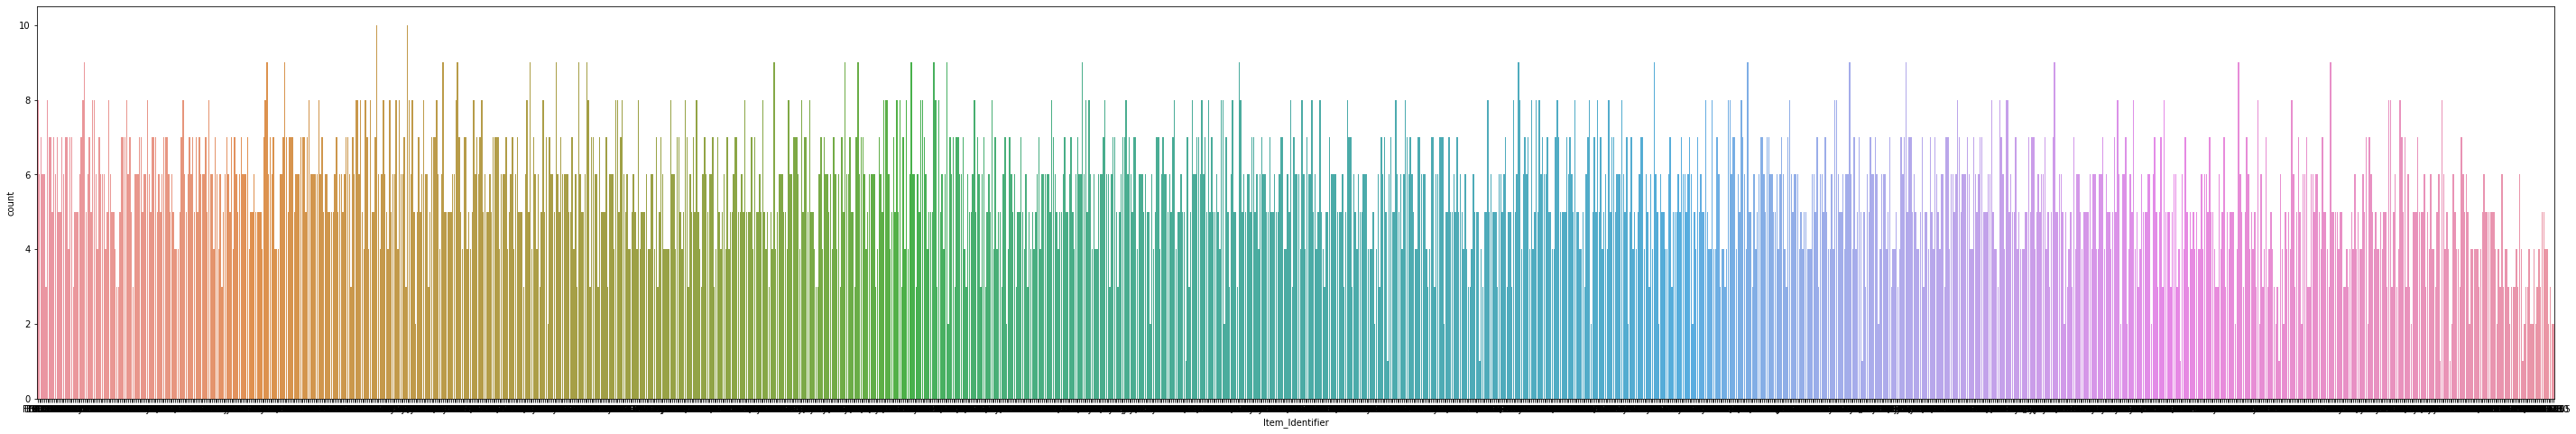

In [24]:
#Item_Identifier
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Item_Identifier',data=df)
print(df['Item_Identifier'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


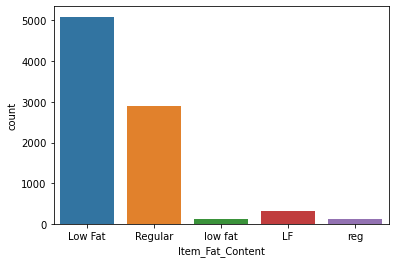

In [25]:
#Item_Fat_Content
ax=sns.countplot(x='Item_Fat_Content',data=df)
print(df['Item_Fat_Content'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


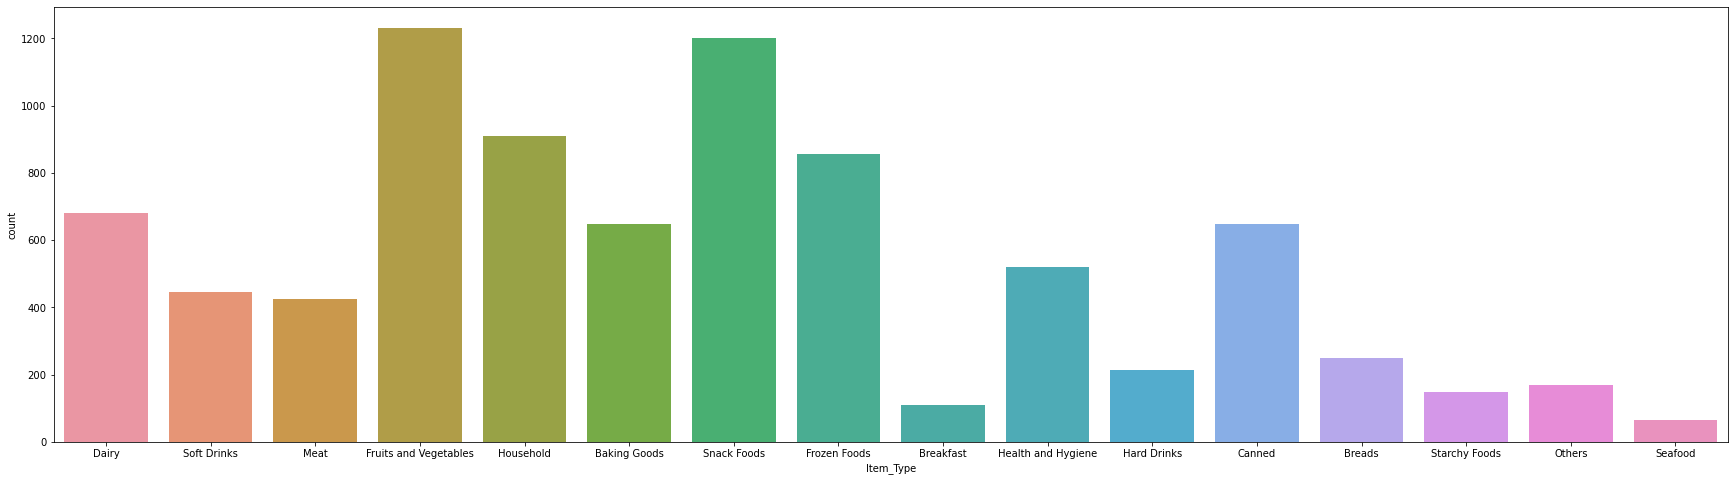

In [26]:
#Item_Type
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Item_Type',data=df)
print(df['Item_Type'].value_counts())

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


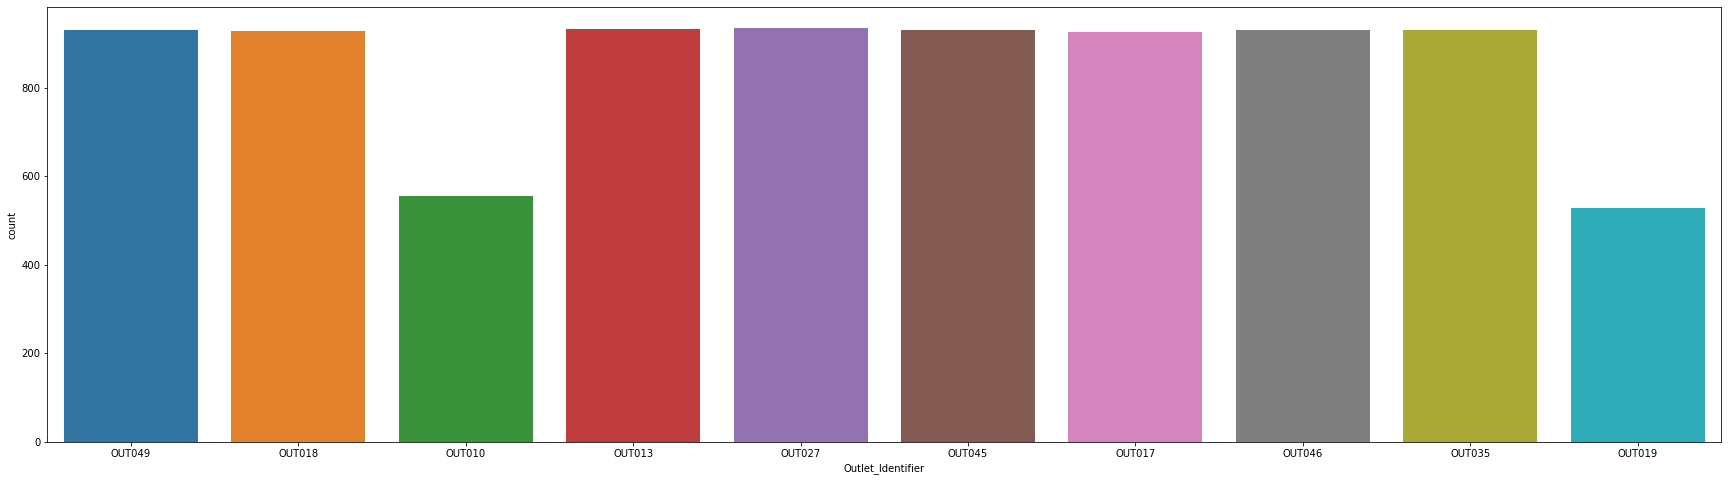

In [27]:
#Outlet_Identifier
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Outlet_Identifier',data=df)
print(df['Outlet_Identifier'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


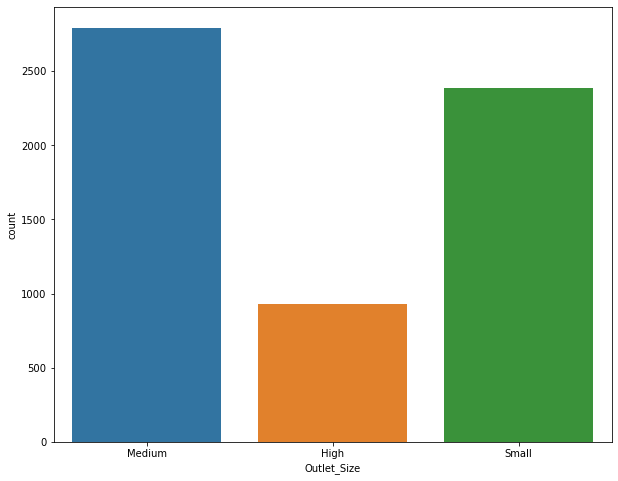

In [28]:
#Outlet_Size
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Size',data=df)
print(df['Outlet_Size'].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


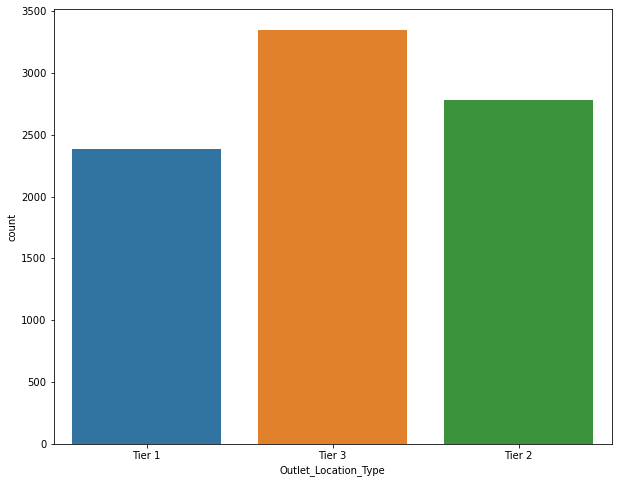

In [29]:
#Outlet_Location_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Location_Type',data=df)
print(df['Outlet_Location_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


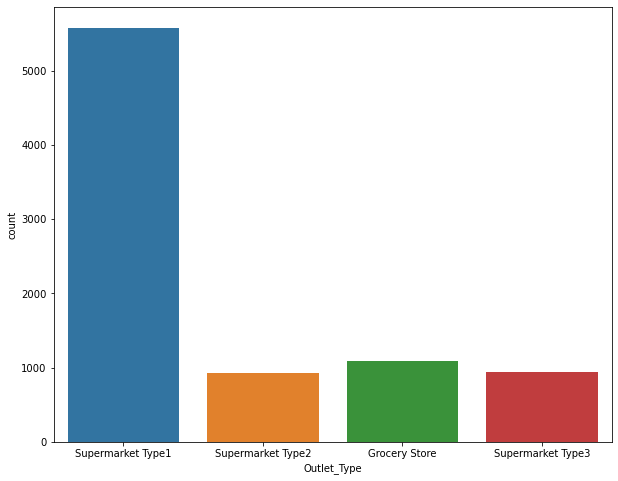

In [30]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Type',data=df)
print(df['Outlet_Type'].value_counts())

# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- The Item_identifiers have a lot of factors(1559) which has affected the visibility of its plot
- Majority of the sample items are low in fat.
- Majority of the sample items were fruits and vegitables
- Majority of the samples were selected from Outlet number 27 under Supermarket 3 
- Majority of the samples were selected from Outlets with Medium Sizes
- Majority of the samples were selected from the Tier 3 Outlets
- Majority of the samples were selected from Supermarket Type1

# Step 3.2 Updating Null values

In [31]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We shall update:
- All continous data with the mean
- All Categorical data with the mode

Lets go!

In [32]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [33]:
#rechecing for null values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

 # Observations on Null Update 
From the above we can see that all null values have been updated! 

# Step 3.3 Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [34]:
#initializing....
enc=OrdinalEncoder()

In [35]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [36]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [37]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [38]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


In [40]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976
8522,50.0,14.800,1.0,0.044878,14.0,75.4670,8.0,1997,2.0,0.0,1.0,765.6700


In [41]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7683,988.0,16.700000,2.0,0.042685,4.0,120.7782,9.0,1999,1.0,0.0,1.0,1072.6038
2241,1175.0,6.710000,2.0,0.029560,0.0,65.8142,8.0,1997,2.0,0.0,1.0,856.8846
7777,1119.0,15.850000,2.0,0.102262,10.0,47.1744,0.0,1998,1.0,2.0,0.0,90.5488
3333,989.0,12.857645,2.0,0.170646,10.0,46.3376,5.0,1985,1.0,2.0,3.0,2109.2544
3910,1529.0,12.857645,1.0,0.096592,8.0,117.4492,5.0,1985,1.0,2.0,3.0,1621.8888
3998,1538.0,9.195000,1.0,0.048135,9.0,107.7622,9.0,1999,1.0,0.0,1.0,529.3110
901,652.0,10.800000,2.0,0.048339,0.0,41.5138,3.0,2009,1.0,2.0,2.0,446.7518
2397,1252.0,20.700000,2.0,0.000000,0.0,98.7042,2.0,2007,1.0,1.0,1.0,1884.8798
5426,1162.0,17.100000,2.0,0.074361,6.0,206.1638,3.0,2009,1.0,2.0,2.0,4141.2760
7297,1179.0,12.857645,2.0,0.170001,4.0,155.9630,5.0,1985,1.0,2.0,3.0,4537.4270


In [42]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [43]:
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

# Step 3.4 - Normal Distribution Check(Univariate Analysis)

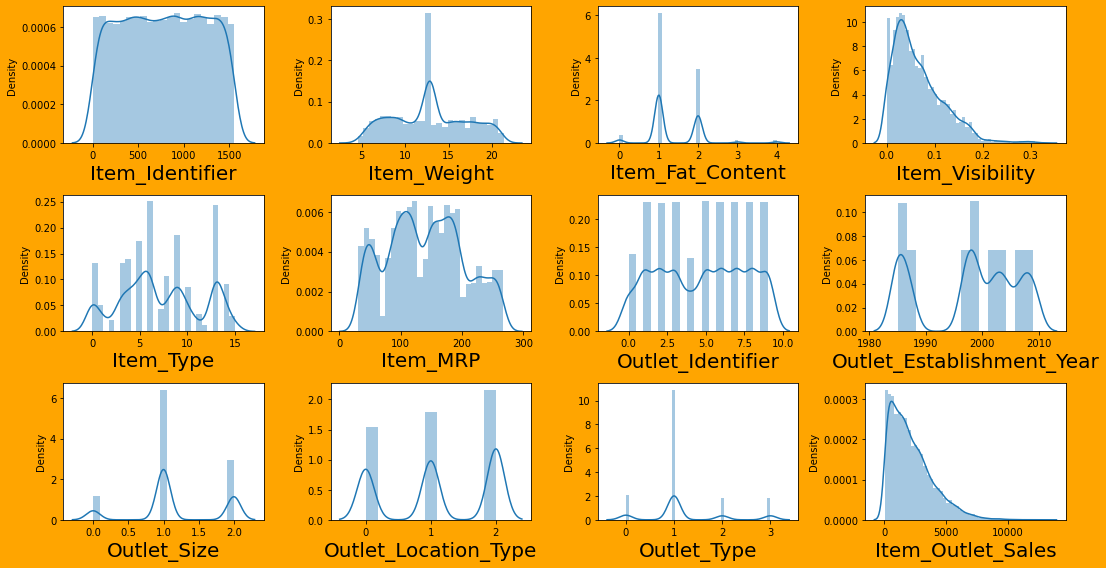

In [44]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='orange')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)#2,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot:

- We can see that All the features does not obey a normal distribution, the building blocks is not in tandem with a normalized     curve

- The normal distribution of these features; 'Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier'               'Outlet_Size', 'Outlet_Location_Type','Outlet_Type' has no contribution to our Model Building since they are categorical data

- The normal distribution of the Item_Outlet_sales columns also has no contribution to our Model Building since its the Target     variable

# Step 3.5 - Scatter Plot (Bivariate Analysis)

In [45]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop(columns=['Item_Outlet_Sales'],axis=1)
features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0


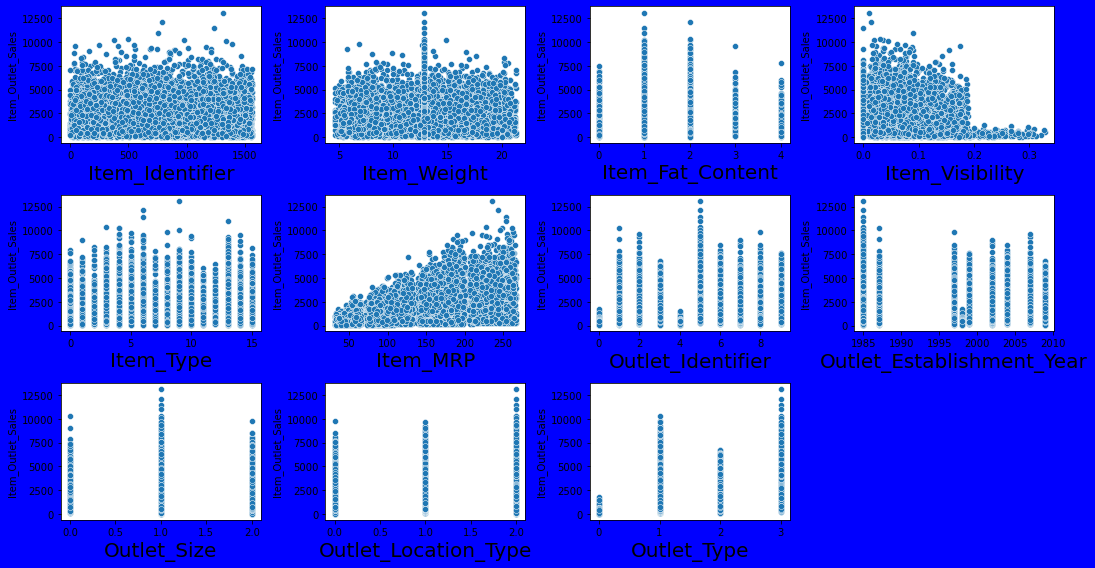

In [46]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=12:#since there are 3 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['Item_Outlet_Sales'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a strong relationship between some of the features and the Label(Item_Outlet_Sales).

# Step 3.6 - Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [47]:
#checking for general correlation
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


In [48]:
#checking for correlation between each feature and Label
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Fat_Content             0.009800
Item_Weight                  0.011550
Item_Type                    0.017048
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

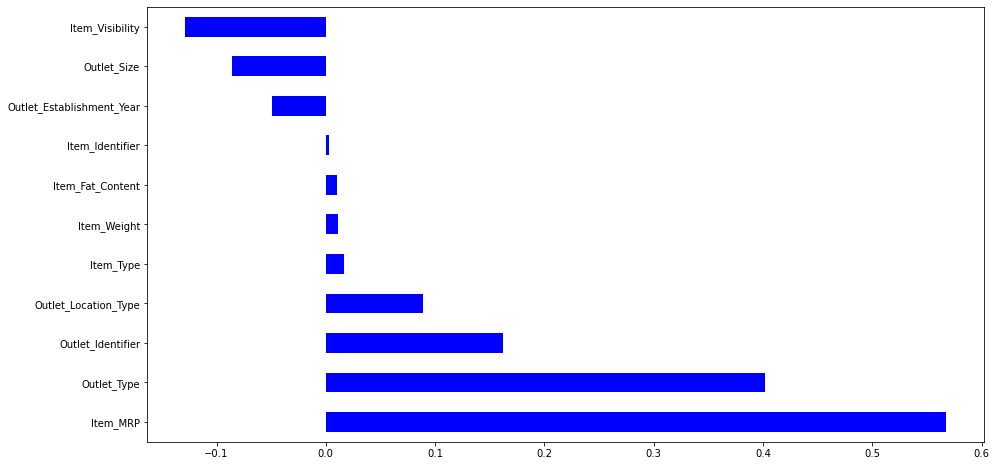

In [49]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

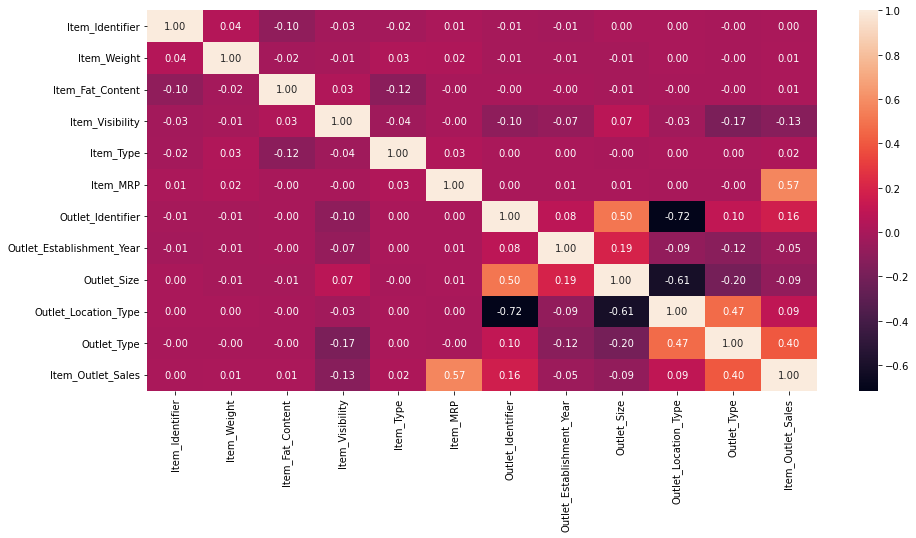

In [50]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

Hmmmm....we can see that most features DO NOT share a 'direct relationship' between each other! as the majority of the map-squares are not bright! But lets conlcude with our findings first:

<function matplotlib.pyplot.show(close=None, block=None)>

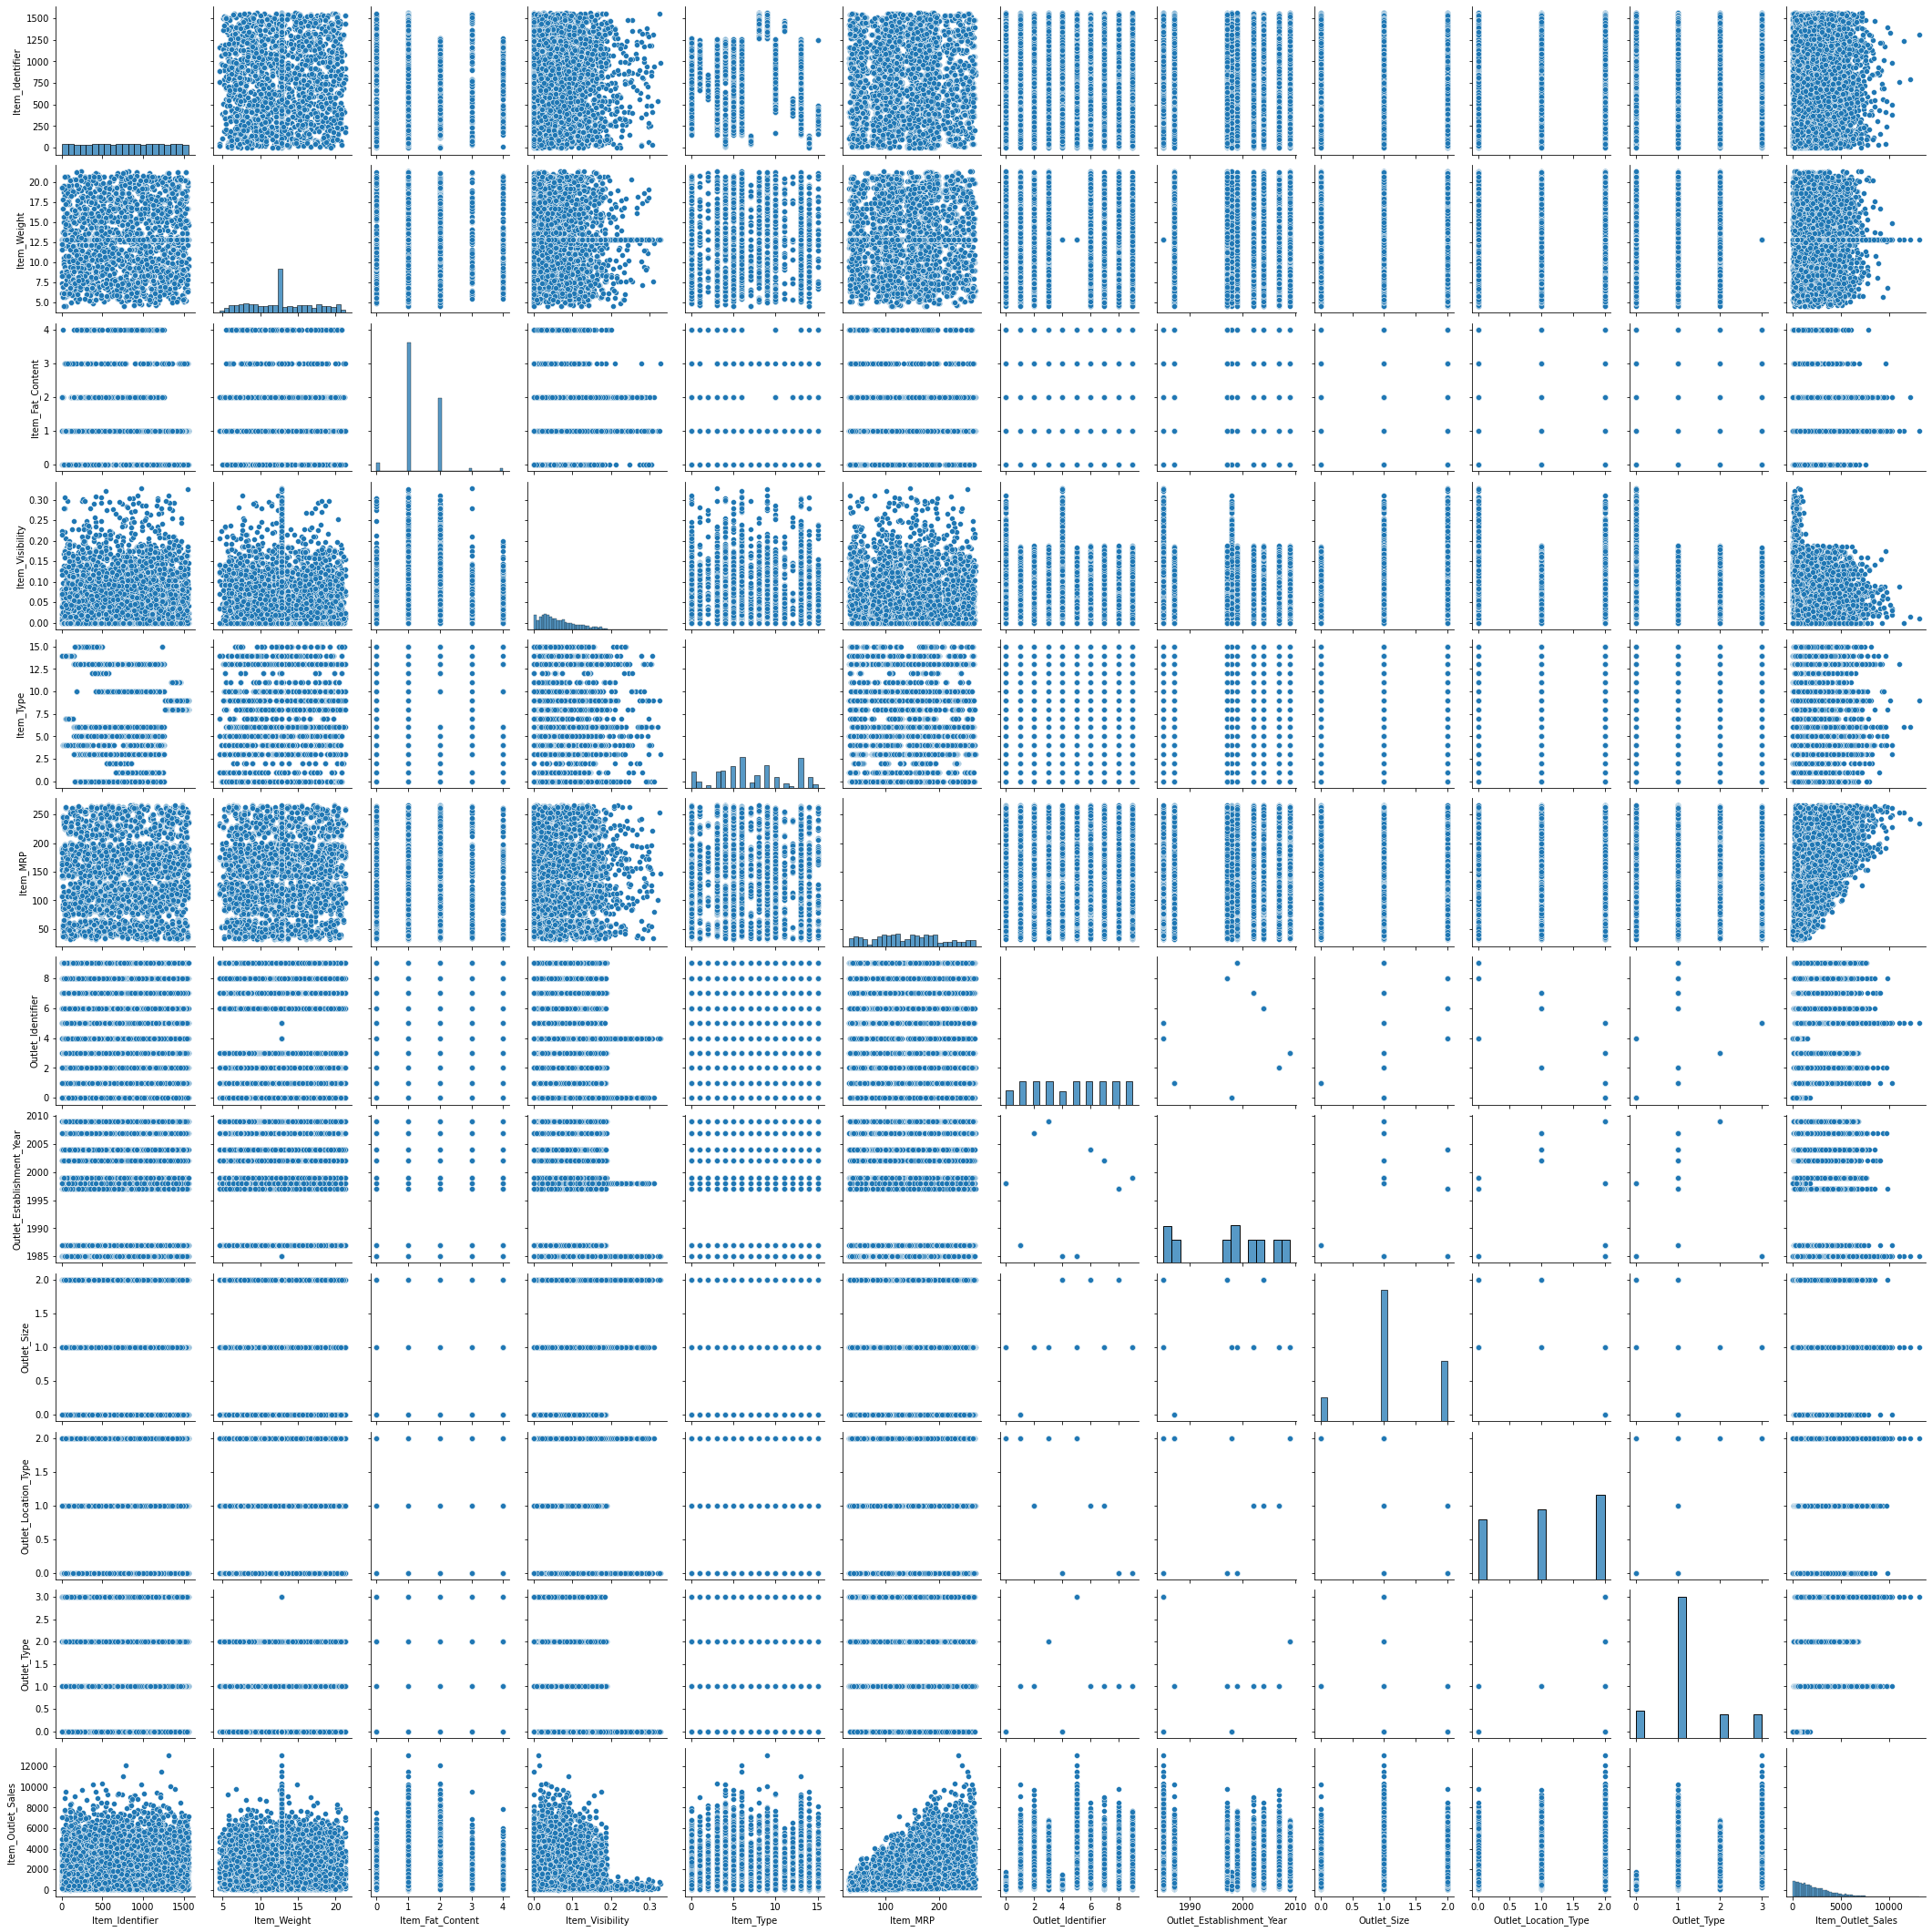

In [51]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [52]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Fat_Content             0.009800
Item_Weight                  0.011550
Item_Type                    0.017048
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

Collinearity:
 - Item_Visibility has a negative correlation of 13% with the target column which can be considered as a weak bond
 - Outlet_Size  has a negative correlation of 9% with the target column which can be considered as a weak bond
 - Outlet_Establishment_Year  has a negative correlation of 5% with the target column which can be considered as a weak bond
 - Item_Identifier has a positive correlation of 0.2% with the target column which can be considered as a poor bond
 - Item_Fat_Content  has a positive correlation of 0.009% with the target column which can be considered as a poor bond
 - Item_Weight  has a positive correlation of 0.01% with the target column which can be considered as a poor bond
 - Item_Type  has a positive correlation of 1.7% with the target column which can be considered as a  poor bond
 - Outlet_Location_Type  has a positive correlation of 8.9% with the target column which can be considered as a weak bond
 - Outlet_Identifier  has a positive correlation of 16% with the target column which can be considered as a fair bond
 - Outlet_Type   has a positive correlation of 40% with the target column which can be considered as a good bond
 - Item_MRP  has a positive correlation of 57% with the target column which can be considered as a good bond

 
 - Feature with Maximum correlation = '57%'
 - Feature with Minimum correlation = '0.2%'
 
Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features DOES NOT have noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.7 - Outlier Check

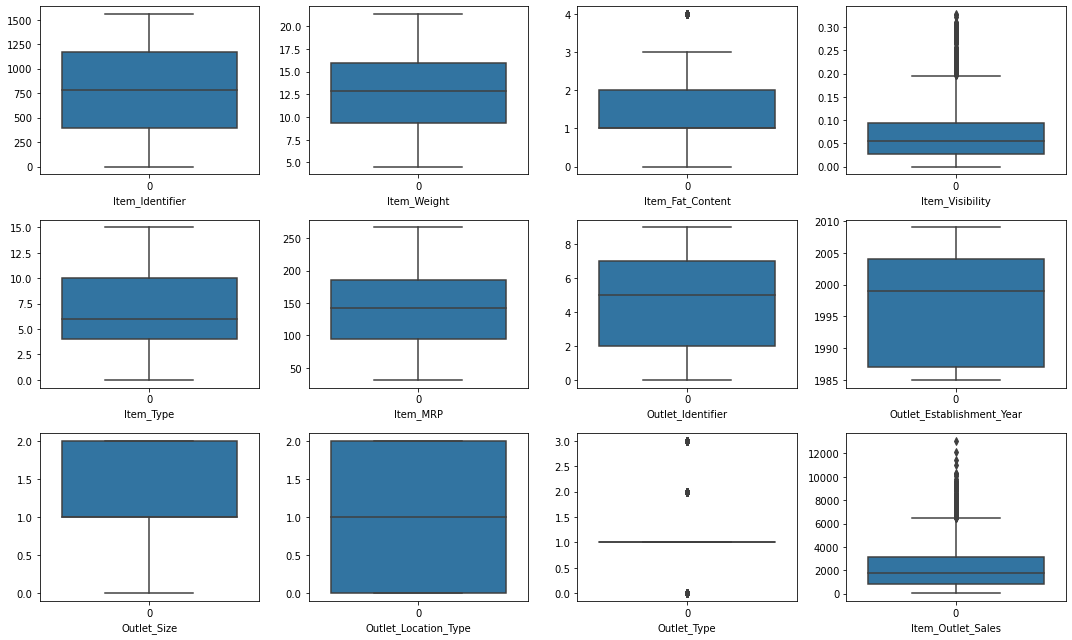

In [53]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=12:#this was made 8 just to allow for 4 spaces
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
 - From the above visualization plot its evident ONLY the item_visibility feature posses outliers, however this is subject to      further analysis and reconfirmation using the zscore!
 
 -  The outlier of the categorical data does not impact our model
 
 - The outlier of the Target data does not impact our model

# Step 3.8 - Skewness Check

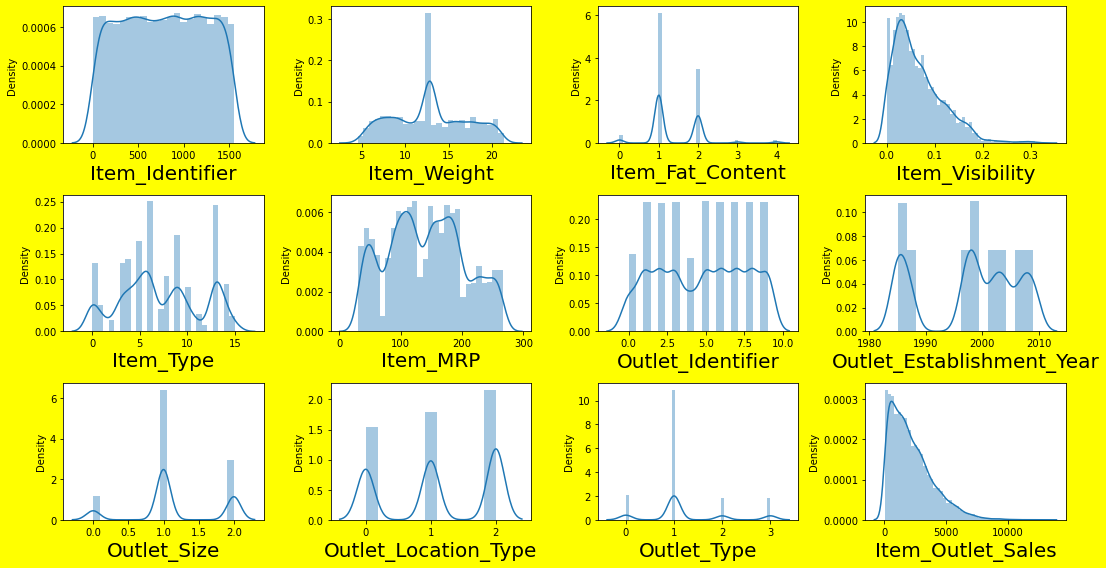

In [54]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [55]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence the below features are skewed:

- Item visibility
- Item_Fat_Content
- Outlet_Type

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates and Unwanted Column

In [56]:
#Recheking shape of original data
df.shape

(8523, 12)

In [57]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(8523, 12)

It appears there are no duplicates since there is no change in the number of rows!

# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

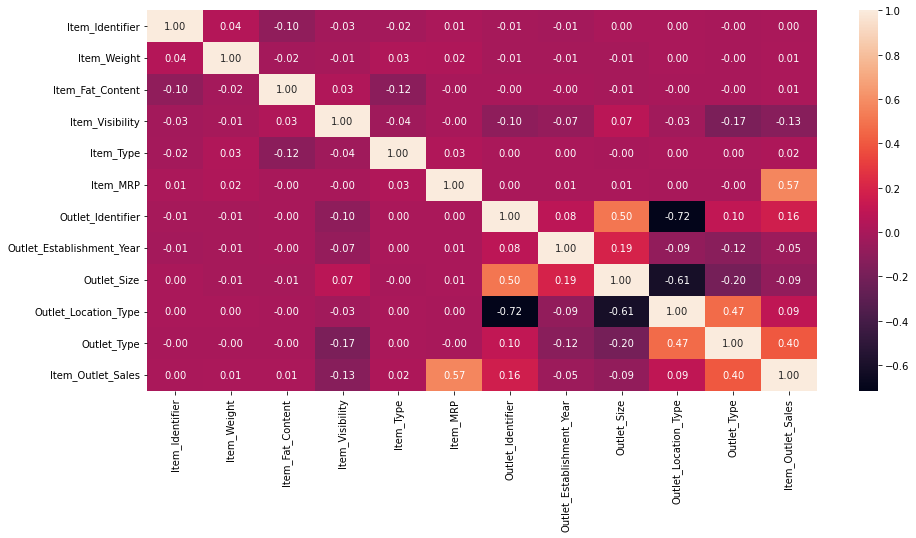

In [58]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that there is no visible correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [59]:
X=df.drop(columns=['Item_Outlet_Sales'])
Y=df['Item_Outlet_Sales']

In [60]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-1.38851383, -0.84187169, -0.57284357, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.71799137, -1.64170589,  0.97809218, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-0.26205684,  1.09855449, -0.57284357, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [ 1.28515188, -0.53424315, -0.57284357, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-0.21975905, -1.33644372,  0.97809218, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-1.62449099,  0.45963367, -0.57284357, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [61]:
#checking the shape
X_Scaled.shape

(8523, 11)

Now we shall treat the above shape as an array of numbers(tuple) where 8523 and 11 are the zeroth and first index respectively.

In [62]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [63]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(3) or (0,1,2), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 3. Now all the columns in X_Scaled which is (0,1,2) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [64]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘sales’ )
vif

,vif,Features
0,1.013706,Item_Identifier
1,1.003732,Item_Weight
2,1.025474,Item_Fat_Content
3,1.064255,Item_Visibility
4,1.017436,Item_Type
5,1.001978,Item_MRP
6,4.149231,Outlet_Identifier
7,1.082108,Outlet_Establishment_Year
8,1.715129,Outlet_Size
9,5.866098,Outlet_Location_Type


From the above vif dataframe,we are setting a vif threshold of 6, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, MULTICOLLINEARITY DOES NOT EXIST!

# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

In [65]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.388514,0.841872,0.572844,0.970732,0.766479,1.747454,1.507813,0.139541,0.284581,1.369334,0.252658,0.910601
1,1.717991,1.641706,0.978092,0.908111,1.608963,1.489023,0.607071,1.334103,0.284581,1.091569,1.002972,1.018440
2,0.262057,1.098554,0.572844,0.956917,0.658786,0.010040,1.507813,0.139541,0.284581,1.369334,0.252658,0.049238
3,0.759769,1.500838,0.978092,1.281758,0.291391,0.660050,1.664513,0.020085,0.284581,1.091569,1.508289,0.849103
4,1.151580,0.929428,0.572844,1.281758,0.421242,1.399220,1.312032,1.293934,1.950437,1.091569,0.252658,0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.912107,1.418084,0.572844,0.181193,1.371418,1.180783,1.312032,1.293934,1.950437,1.091569,0.252658,0.349915
8519,0.261100,1.059578,0.978092,0.371154,1.716656,0.527301,0.802852,0.497909,0.284581,0.138882,0.252658,0.956402
8520,1.285152,0.534243,0.572844,0.599784,0.183698,0.897208,0.450371,0.736822,1.381274,0.138882,0.252658,0.579100
8521,0.219759,1.336444,0.978092,1.532880,1.371418,0.607977,0.607071,1.334103,0.284581,1.091569,1.002972,0.196725


In [66]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(8523, 12)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [67]:
#index number
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [68]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (8523, 12)
New DataFrame (8222, 12)
total_dropped_rows 301


A Total of 301 outliers have been removed! Lets move on! Data is looking great!

In [69]:
#Checking the new dataframe with non-outliers
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


Now we need to reset our data having removed outliers.....

In [70]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8217,8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8218,8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8219,8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8220,8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [71]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8218,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8219,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8220,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


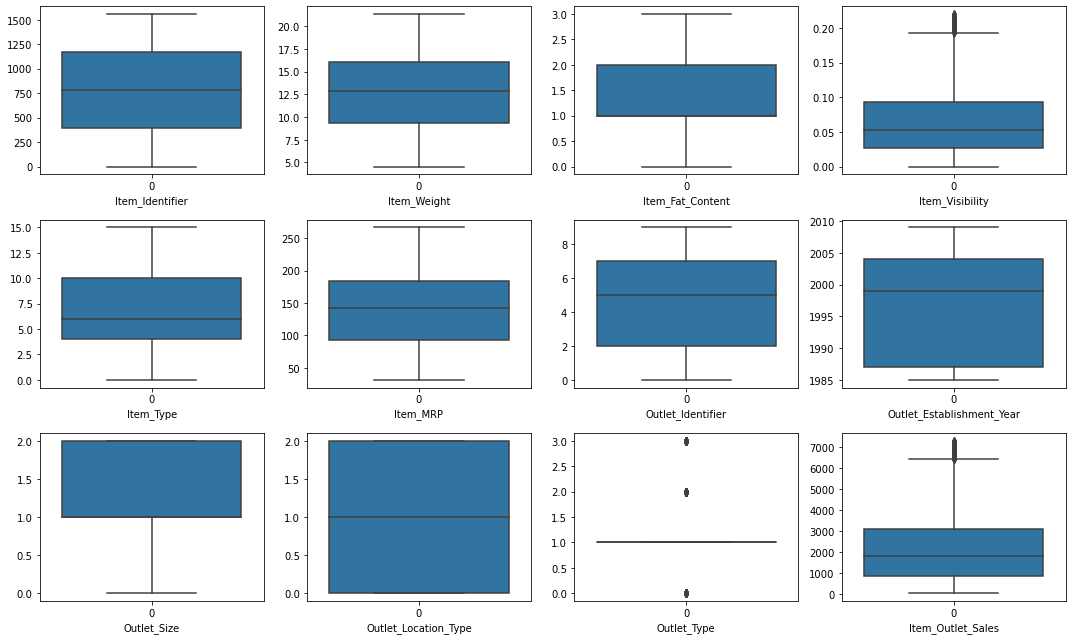

In [72]:
#rechecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=12:
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing box plots
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that all outliers have been removed across the features!

# Step 4.4 - Transforming Data to Remove Skewness using Power transformation

In [73]:
#rechecking for skewness...
df_new.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

From the above the below features are skewed based on a threshold of +/-0.4
- Item Visibility
- Outlet_Type
- Outlet_Establishment_Year

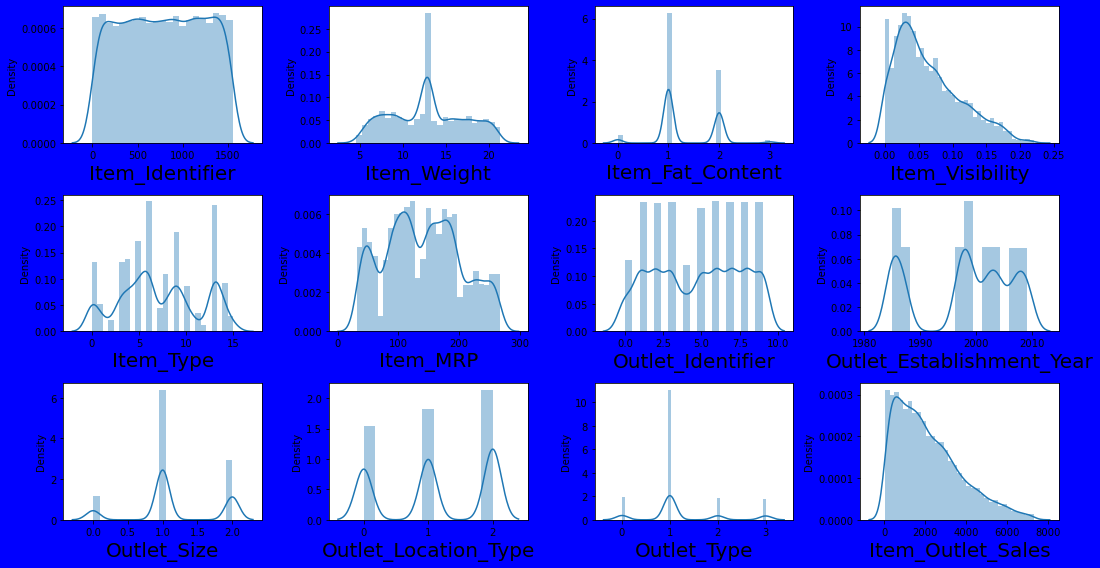

In [74]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

A good Pre-Power Transformation procedure is to ensure that there are no zero values in the data stored in 'cont_features' because from domain knowledge, none of the data values in each features(except Sex column) should be zero!

In [75]:
#Firstly, replacing zero values in the continuos columns with the mean (since its made up of continuos data)
df_new['Item_Weight']=df_new['Item_Weight'].replace(0,df_new['Item_Weight'].mean())
df_new['Item_Visibility']=df_new['Item_Visibility'].replace(0,df_new['Item_Visibility'].mean())
df_new['Item_MRP']=df_new['Item_MRP'].replace(0,df_new['Item_MRP'].mean())
df_new['Outlet_Establishment_Year']=df_new['Outlet_Establishment_Year'].replace(0,df_new['Outlet_Establishment_Year'].mode()[0])

Let lets go ahead and apply Power Transformation!

In [76]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [109]:
#extracting the columns that are skewed
data=['Item_Visibility','Outlet_Type','Outlet_Establishment_Year']

In [110]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

In [111]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,-1.442588,4.0,249.8092,9.0,0.031704,1.0,0.0,-0.135081,3735.1380
1,8.0,5.920,2.0,-1.312419,14.0,48.2692,3.0,1.451492,1.0,2.0,1.054850,443.4228
2,662.0,17.500,1.0,-1.413501,10.0,141.6180,9.0,0.031704,1.0,0.0,-0.135081,2097.2700
3,1121.0,19.200,2.0,0.113966,6.0,182.0950,0.0,-0.093218,1.0,2.0,-1.971736,732.3800
4,1297.0,8.930,1.0,0.113966,9.0,53.8614,1.0,-1.293670,0.0,2.0,-0.135081,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,370.0,6.865,1.0,-0.074259,13.0,214.5218,1.0,-1.293670,0.0,2.0,-0.135081,2778.3834
8218,897.0,8.380,2.0,-0.354574,0.0,108.1570,7.0,0.424107,1.0,1.0,-0.135081,549.2850
8219,1357.0,10.600,1.0,-0.730140,8.0,85.1224,6.0,0.701080,2.0,1.0,-0.135081,1193.1136
8220,681.0,7.210,2.0,1.551287,13.0,103.1332,3.0,1.451492,1.0,2.0,1.054850,1845.5976


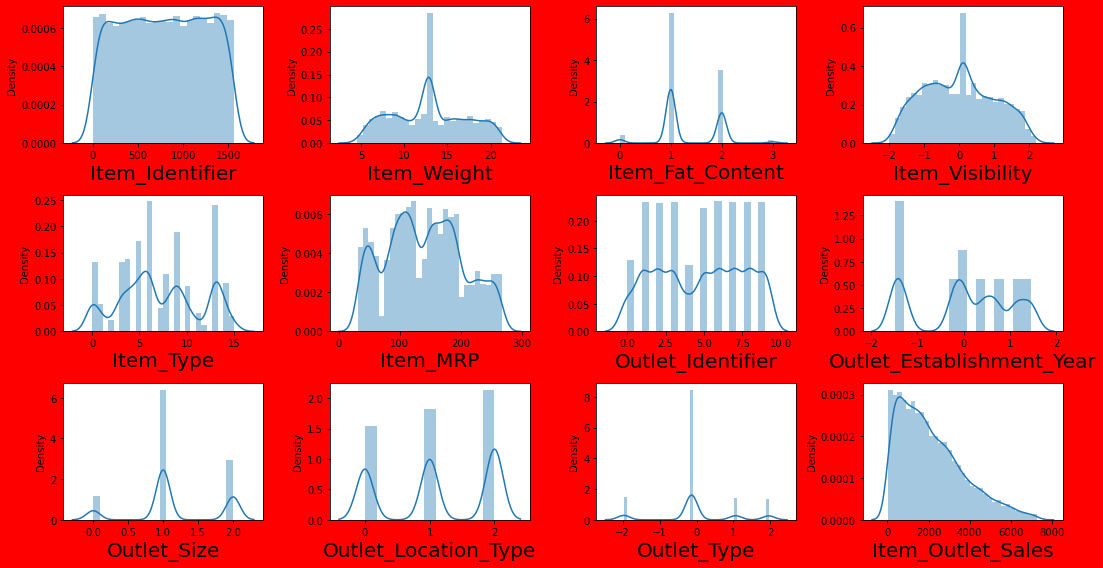

In [112]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=12:#since there are 6 features
        ax = plt.subplot(3,4,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [113]:
#rechecking for skewness
df_new.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.124840
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.222552
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.010506
Item_Outlet_Sales            0.877476
dtype: float64

From the above you can see all skewness in all continuos data are now within the threshold of +/-0.5 which was chosen earlier!

From the above we can see that skewness has been removed!

NOTE:
- All continuos data columns was considered for skewness removal
- The Item_Outlet_Sales column is not considered for skewness since its the Target data

# Step 4.5 - Seperating the datasets into X and Y variables

In [114]:
#seperation
X=df_new.drop(columns=['Item_Outlet_Sales'])
Y=df_new['Item_Outlet_Sales']

# Transforming data into standard normal distribution

In [115]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-1.38525904, -0.83758301, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.13508106],
       [-1.71298557, -1.6325653 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.05485046],
       [-0.26478859,  1.09107226, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.13508106],
       ...,
       [ 1.2741975 , -0.53182058, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.13508106],
       [-0.22271559, -1.3291549 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.05485046],
       [-1.6199821 ,  0.45602723, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.13508106]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [116]:
#reconfirming that mean is 0
X_Scaled.mean()

-3.3880448773417574e-19

In [117]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Step 5 - MODEL BUILDING

# Step 5.1 - KNN Regressor

# Best Random State

In [189]:
#Using KNeighbors Regressor to get the best Random state
knn=KNeighborsRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  48.51 and 66.65 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  839.58 and 660.2 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1339046.06 and 660.2 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1157.17 and 25.69 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  46.91 and 66.33 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  819.21 and 673.4 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1286807.23 and 673.4 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1134.38 and 25.95 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  48.95 and 66.24 respectively
At random state of :-  

The best accuracy is 52.98% at random state 88

We have found best_random state value as 88. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=88,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [119]:
knn=KNeighborsRegressor()#Initializing...
knn.fit(x_train,y_train)#Training...
pred_test=knn.predict(x_test)#Prediciting using test data...
pred_train=knn.predict(x_train)#Prediciting using training data...
Test_Accuracy_knn= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_knn= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_knn= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_knn= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_knn= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_knn= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_knn= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_knn= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_knn)#printing mean absolute error
print("Test_MSE ", Test_mse_knn)#printing mean squared error
print("Test_RMSE ", Test_rmse_knn)#printing root mean squared error

Test_Accuracy  52.92
Test_MAE  768.4925872583588
Test_MSE  1124176.0825194665
Test_RMSE  1060.2717022157417


KNeighbors is producing average accuracy 52.92% which is very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [120]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[0.19582691 0.20499631 0.18015519 0.20057628 0.1984292 ]
Cross Validation Score is  0.19599677674932167


# Difference between Accuracy Score and Cross Validation Score

In [121]:
Test_Accuracy_knn

0.5291629424804383

In [122]:
CV_Score_knn

0.19599677674932167

In [123]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.33316616573111657


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.333) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.2 - Decision Tree Regressor

In [103]:
#Using Decision Tree Regressor to get the best Random state
dt=DecisionTreeRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  22.56 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1023.46 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  2013739.69 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1419.06 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  15.25 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1008.58 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  2054155.31 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1433.23 and 0.0 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  17.24 and 100.0 respectively
At random state of :-  2 the mean

The best accuracy is 23.1% at random state 106

We have found best_random state value as 106. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [124]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=106,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [125]:
dt=DecisionTreeRegressor()#Initializing...
dt.fit(x_train,y_train)#Training...
pred_test=dt.predict(x_test)#Prediciting using test data...
pred_train=dt.predict(x_train)#Prediciting using training data...
Test_Accuracy_dt= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_dt= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_dt= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_dt= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_dt= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_dt= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_dt= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_dt= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_dt)#printing mean absolute error
print("Test_MSE ", Test_mse_dt)#printing mean squared error
print("Test_RMSE ", Test_rmse_dt)#printing root mean squared error

Test_Accuracy  22.9
Test_MAE  1015.4308052279636
Test_MSE  1972925.2326565408
Test_RMSE  1404.6085691951837


Decision Tree is producing average accuracy 22.1% which is poor!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [126]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.15470246 0.09898132 0.09224416 0.12933701 0.18414345]
Cross Validation Score is  0.13188167958979347


# Difference between Accuracy Score and Cross Validation Score

In [127]:
Test_Accuracy_dt

0.22896488208147514

In [128]:
CV_Score_dt

0.13188167958979347

In [129]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.09708320249168167


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.098) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.3 - RandomForest Regressor

# Best Random State

In [205]:
#Using RandomForest Regressor to get the best Random state
rf=RandomForestRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")


At random state of :- 0 Testing Accuracy and Training Accuracy are:-  54.89 and 93.55 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  783.68 and 284.05 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1173048.34 and 284.05 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1083.07 and 16.85 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  52.98 and 93.68 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  768.97 and 283.78 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1139765.08 and 283.78 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1067.6 and 16.85 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  55.35 and 93.57 respectively
At random state of :

The best accuracy is 59.32% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [130]:
#using the random state of 6
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [131]:
rf=RandomForestRegressor()#Initializing...
rf.fit(x_train,y_train)#Training...
pred_test=rf.predict(x_test)#Prediciting using test data...
pred_train=rf.predict(x_train)#Prediciting using training data...
Test_Accuracy_rf= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_rf= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_rf= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_rf= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_rf= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_rf= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_rf= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_rf= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_rf)#printing mean absolute error
print("Test_MSE ", Test_mse_rf)#printing mean squared error
print("Test_RMSE ", Test_rmse_rf)#printing root mean squared error

Test_Accuracy  60.09
Test_MAE  726.0943542151977
Test_MSE  1011709.0485200633
Test_RMSE  1005.837486137827


RandomForest is producing fair accuracy = 59.81%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [132]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.54324585 0.52381149 0.5135219  0.54905689 0.54167992]
Cross Validation Score is  0.5342632091361719


# Difference between Accuracy Score and Cross Validation Score

In [133]:
Test_Accuracy_rf

0.6008587159367111

In [134]:
CV_Score_rf

0.5342632091361719

In [148]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06659550680053927


From the above you can see that difference between Accuracy and Cross Validation score is low (0.063) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.4 - GradientBoosting Classifier

# Best Random State

In [228]:
#Using GradientBoosting to get the best Random state
gb=GradientBoostingRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  59.01 and 62.44 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  748.49 and 696.43 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1065894.51 and 696.43 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1032.42 and 26.39 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  57.82 and 62.48 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  730.13 and 703.33 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1022386.55 and 703.33 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1011.13 and 26.52 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  59.59 and 62.51 respectively
At random state of 

The best accuracy is 63.57% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [136]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [137]:
gb=GradientBoostingRegressor()#Initializing...
gb.fit(x_train,y_train)#Training...
pred_test=gb.predict(x_test)#Prediciting using test data...
pred_train=gb.predict(x_train)#Prediciting using training data...
Test_Accuracy_gb= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_gb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_gb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_gb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_gb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_gb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_gb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_gb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_gb)#printing mean absolute error
print("Test_MSE ", Test_mse_gb)#printing mean squared error
print("Test_RMSE ", Test_rmse_gb)#printing root mean squared error

Test_Accuracy  63.61
Test_MAE  696.4074261028195
Test_MSE  922279.0418480152
Test_RMSE  960.3536025069178


GradientBoosting is producing good accuracy = 63.57%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [138]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.58570052 0.57760835 0.566856   0.59155118 0.59471772]
Cross Validation Score is  0.5832867531602022


# Difference between Accuracy Score and Cross Validation Score

In [139]:
Test_Accuracy_gb

0.6361408039531078

In [140]:
CV_Score_gb

0.5832867531602022

In [141]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.052854050792905616


From the above you can see that difference between Accuracy and Cross Validation score is low (0.052) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.5 - XGBoost Classifier

# Best Random State

In [235]:
#Using XGBoost Regressor to get the best Random state
xgb=XGBRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  53.58 and 84.93 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  797.63 and 443.13 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1207024.95 and 443.13 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1098.65 and 21.05 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  49.91 and 84.86 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  795.89 and 450.26 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1214031.78 and 450.26 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1101.83 and 21.22 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  52.73 and 84.73 respectively
At random state of 

The best accuracy is 58.27% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [142]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [143]:
xgb=XGBRegressor()#Initializing...
xgb.fit(x_train,y_train)#Training...
pred_test=xgb.predict(x_test)#Prediciting using test data...
pred_train=xgb.predict(x_train)#Prediciting using training data...
Test_Accuracy_xgb=(metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_xgb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_xgb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_xgb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_xgb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_xgb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_xgb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_xgb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_xgb)#printing mean absolute error
print("Test_MSE ", Test_mse_xgb)#printing mean squared error
print("Test_RMSE ", Test_rmse_xgb)#printing root mean squared error

Test_Accuracy  58.27
Test_MAE  742.1884384191301
Test_MSE  1057685.6328869804
Test_RMSE  1028.4384438978254


XGBoost is producing good accuracy = 58.27%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [144]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.52101404 0.49940907 0.47882541 0.50369286 0.52964244]
Cross Validation Score is  0.5065167638494408


# Difference between Accuracy Score and Cross Validation Score

In [145]:
Test_Accuracy_xgb

0.5827199506979306

In [146]:
CV_Score_xgb

0.5065167638494408

In [147]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.07620318684848981


From the above you can see that difference between Accuracy and Cross Validation score is low (0.076) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.6 - ExtraTrees Regressor

# Best Random State

In [242]:
#Using ExtraTree Regressor to get the best Random state
ex=ExtraTreesRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  53.62 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  791.96 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1206025.44 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1098.19 and 0.06 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  50.97 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  781.69 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1188318.58 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1090.1 and 0.03 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  54.53 and 100.0 respectively
At random state of :-  2 the mean 

The best accuracy is 59.41% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [149]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [150]:
ex=ExtraTreesRegressor()#Initializing...
ex.fit(x_train,y_train)#Training...
pred_test=ex.predict(x_test)#Prediciting using test data...
pred_train=ex.predict(x_train)#Prediciting using training data...
Test_Accuracy_ex= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ex= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ex= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ex= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ex= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ex= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ex= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ex= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ex)#printing mean absolute error
print("Test_MSE ", Test_mse_ex)#printing mean squared error
print("Test_RMSE ", Test_rmse_ex)#printing root mean squared error

Test_Accuracy  59.01
Test_MAE  729.627513993921
Test_MSE  1039011.7381305225
Test_RMSE  1019.3192523103459


ExtraTress  is producing good accuracy = 59.19%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [151]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.54225228 0.50846951 0.50475285 0.53978766 0.51948584]
Cross Validation Score is  0.5229496289918052


# Difference between Accuracy Score and Cross Validation Score

In [152]:
Test_Accuracy_ex

0.5900872094394218

In [153]:
CV_Score_ex

0.5229496289918052

In [154]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.06713758044761664


From the above you can see that difference between Accuracy and Cross Validation score is low (0.067) meaning that model is not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.7 - Support Vector Regressor(SVR)

# Best Random State

In [249]:
#Using Support Vector Regressor to get the best Random state
sv=SVR()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  4.53 and 5.23 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  1185.3 and 1180.78 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  2482776.69 and 1180.78 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1575.68 and 34.36 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  5.69 and 5.08 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  1166.69 and 1184.51 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  2285930.6 and 1184.51 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1511.93 and 34.42 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  5.44 and 5.4 respectively
At random state of :- 

The best accuracy is 7.9% at random state 14

We have found best_random state value as 14. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [155]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=14,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [156]:
sv=SVR()#Initializing...
sv.fit(x_train,y_train)#Training...
pred_test=sv.predict(x_test)#Prediciting using test data...
pred_train=sv.predict(x_train)#Prediciting using training data...
Test_Accuracy_sv= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_sv= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_sv= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_sv= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_sv= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_sv= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_sv= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_sv= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_sv)#printing mean absolute error
print("Test_MSE ", Test_mse_sv)#printing mean squared error
print("Test_RMSE ", Test_rmse_sv)#printing root mean squared error

Test_Accuracy  8.35
Test_MAE  1155.1413562996488
Test_MSE  2239547.6281987866
Test_RMSE  1496.511820266979


Support Vector is producing good accuracy = 8.35%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [157]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[-0.03910637 -0.01888692 -0.04920228 -0.02933133 -0.02162945]
Cross Validation Score is  -0.03163126941698095


# Difference between Accuracy Score and Cross Validation Score

In [158]:
Test_Accuracy_sv

0.0834630053455554

In [159]:
CV_Score_sv

-0.03163126941698095

In [160]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.11509427476253635


From the above you can see that difference between Accuracy and Cross Validation score is low(0.115) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 7 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [161]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['KNeigbors Regressor','DecisionTree Regressor','Random Forest Regressor','Gradient Boosting Regressor', 'XgBoost','Extra Trees Regressor','SVR'],'Accuracy_Score' : [Test_Accuracy_knn,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_knn,CV_Score_dt,CV_Score_rf,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[knn_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score],'MAE':[Test_mae_knn,Test_mae_dt,Test_mae_rf,Test_mae_gb,Test_mae_xgb,Test_mae_ex,Test_mae_sv],'MSE':[Test_mse_knn,Test_mse_dt,Test_mse_rf,Test_mse_gb,Test_mse_xgb,Test_mse_ex,Test_mse_sv],'RMSE':[Test_rmse_knn,Test_rmse_dt,Test_rmse_rf,Test_rmse_gb,Test_rmse_xgb,Test_rmse_ex,Test_rmse_sv]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
0,KNeigbors Regressor,0.529163,0.195997,0.333166,768.492587,1.124176e+06,1060.271702
1,DecisionTree Regressor,0.228965,0.131882,0.097083,1015.430805,1.972925e+06,1404.608569
2,Random Forest Regressor,0.600859,0.534263,0.066596,726.094354,1.011709e+06,1005.837486
3,Gradient Boosting Regressor,0.636141,0.583287,0.052854,696.407426,9.222790e+05,960.353603
4,XgBoost,0.582720,0.506517,0.076203,742.188438,1.057686e+06,1028.438444
5,Extra Trees Regressor,0.590087,0.522950,0.067138,729.627514,1.039012e+06,1019.319252
6,SVR,0.083463,-0.031631,0.115094,1155.141356,2.239548e+06,1496.511820


In [162]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
3,Gradient Boosting Regressor,64.0,59.0,0.052854,696.407426,9.222790e+05,960.353603
2,Random Forest Regressor,61.0,54.0,0.066596,726.094354,1.011709e+06,1005.837486
5,Extra Trees Regressor,60.0,53.0,0.067138,729.627514,1.039012e+06,1019.319252
4,XgBoost,59.0,51.0,0.076203,742.188438,1.057686e+06,1028.438444
0,KNeigbors Regressor,53.0,20.0,0.333166,768.492587,1.124176e+06,1060.271702
1,DecisionTree Regressor,23.0,14.0,0.097083,1015.430805,1.972925e+06,1404.608569
6,SVR,9.0,-3.0,0.115094,1155.141356,2.239548e+06,1496.511820


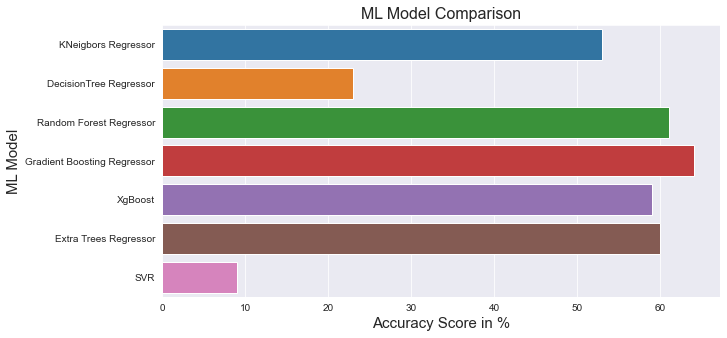

In [163]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that Gradient Boost(63.56%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so lets consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [164]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
3,Gradient Boosting Regressor,64.0,59.0,0.052854,696.407426,9.222790e+05,960.353603
2,Random Forest Regressor,61.0,54.0,0.066596,726.094354,1.011709e+06,1005.837486
5,Extra Trees Regressor,60.0,53.0,0.067138,729.627514,1.039012e+06,1019.319252
4,XgBoost,59.0,51.0,0.076203,742.188438,1.057686e+06,1028.438444
1,DecisionTree Regressor,23.0,14.0,0.097083,1015.430805,1.972925e+06,1404.608569
6,SVR,9.0,-3.0,0.115094,1155.141356,2.239548e+06,1496.511820
0,KNeigbors Regressor,53.0,20.0,0.333166,768.492587,1.124176e+06,1060.271702


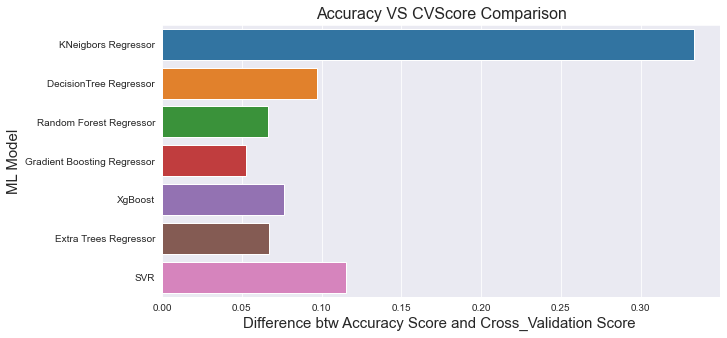

In [165]:
#A more clearer visualization.....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'ML_Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is STILL Gradient Boosting Regressor!

# Step 6.2 - Conclusion on Best Choice of Model

From the above we can see:
 - The Model with least difference(0.008) between Accuracy Score(r2 score) and Cross Validation Score is GRADIENT BOOSTING REGRESSOR!
 

# Hence Optimum Machine Model Chosen = GRADIENT BOOSTING REGRESSOR!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [166]:
gb=GradientBoostingRegressor()

In [154]:
param_grid = {'max_depth':range(4,8),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3),'n_estimators': [10,50,100]}

In [155]:
#Gridsearch
gridsearch = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train);

In [156]:
#Get best hyperparameters
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

Now lets use the best parameters.....

In [317]:
#Instantiating using the best parameters...
gb=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=55,min_samples_split=6,criterion='mse',max_features='auto')

In [318]:
#fitting the model...
gb.fit(x_train,y_train)

GradientBoostingRegressor(criterion='mse', max_features='auto',
                          min_samples_split=6, n_estimators=55)

In [319]:
pred_test=gb.predict(x_test)

In [320]:
metrics.r2_score(y_test,pred_test)

0.5953360568643625

# Step 8 - MODEL SAVING

In [345]:
filename='Machine_Model_Project_Big_Data_Mart'
pickle.dump(gb,open(filename,'wb'))